In [1]:
import pandas as pd
import numpy as np
from indigo import *
import seaborn as sns
import matplotlib.pyplot as plt

indigo = Indigo()

indigo.setOption("ignore-stereochemistry-errors", True)
indigo.setOption("ignore-bad-valence", True)

indigo.setOption('fp-sim-qwords', 8)
indigo.setOption("fp-ord-qwords", 25)
indigo.setOption('fp-any-qwords', 15)
indigo.setOption('fp-tau-qwords', 25)
indigo.setOption('fp-ext-enabled', True)

def get_finger(struct):
    mol = indigo.loadMolecule(struct)
    try:
        finger = mol.fingerprint('full')
    except IndigoException as e:
        return None
    else:
        return finger.toBuffer()




df = pd.read_csv('Adrenergic_dataset.csv')
df['finger'] = df['Structure'].map(get_finger)
df = df[df['finger'].notna()]



df_ph = df[(df['logP'].notna())]
df_ad_val = df[df['AdrA1A_PCHEMBL_VALUE'].notna()]




ph_labels = np.array(df_ph['logP'])
ph_vals = np.array([*df_ph['finger']])





ad_labels = np.array(df_ad_val['AdrA1A_PCHEMBL_VALUE'])
ad_vals = np.array([*df_ad_val['finger']])

# fp-ord-qwords 25

# fp-sim-qwords 8

# fp-any-qwords 15

# fp-tau-qwords 25

<AxesSubplot:xlabel='logP', ylabel='Count'>

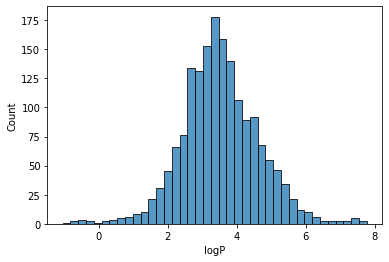

In [2]:
sns.histplot(df_ph['logP'])

<AxesSubplot:xlabel='AdrA1A_PCHEMBL_VALUE', ylabel='Count'>

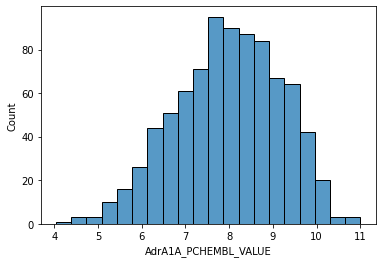

In [3]:
sns.histplot(df_ad_val['AdrA1A_PCHEMBL_VALUE'])

# scripts

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def get_r2_score(vals, labels, regressor):
    train_features, test_features, train_labels, test_labels = train_test_split(vals, labels, 
                                                                            test_size = 0.25, random_state = 42)
    regressor.fit(train_features, train_labels)
    preds = regressor.predict(test_features)
    return r2_score(test_labels, preds), preds, test_labels


def build_graphs(preds, actual, title = ''):
    title = title
    x, y = pd.Series(actual, name="Actual"), pd.Series(preds, name="Predictions")
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    sns.regplot(x=x, y=y, ax = ax[0])
    sns.residplot(x=x, y=y, ax = ax[1])
    ax[0].set_title(title)
    ax[1].set_title(f'Residual plot for {title}')

# random fosrest

In [5]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#### logP

In [6]:
scores, preds, actual = get_r2_score(ph_vals, ph_labels, rf)
scores

0.7307617214450788

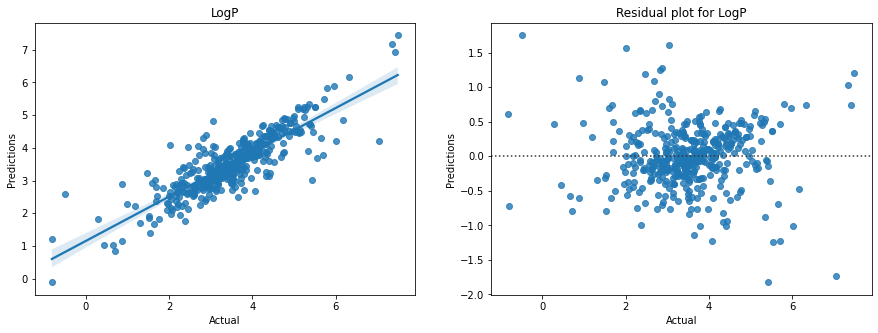

In [7]:
build_graphs(preds, actual, 'LogP')

#### AdrA1A_PCHEMBL_VALUE

In [8]:
scores, preds, actual = get_r2_score(ad_vals, ad_labels, rf)
scores

0.47587467375810577

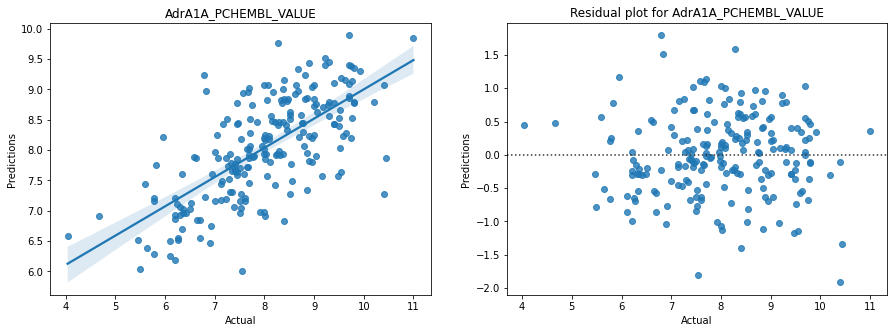

In [9]:
build_graphs(preds, actual, 'AdrA1A_PCHEMBL_VALUE')

# support vectors

In [10]:
from sklearn.svm import SVR


svr = SVR()

#### logP

In [11]:
scores, preds, actual = get_r2_score(ph_vals, ph_labels, svr)
scores

0.7222366027933788

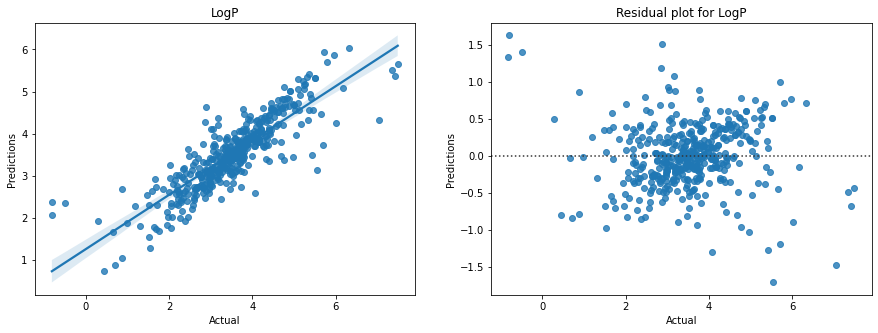

In [12]:
build_graphs(preds, actual, 'LogP')

#### AdrA1A_PCHEMBL_VALUE

In [13]:
scores, preds, actual = get_r2_score(ad_vals, ad_labels, svr)
scores

0.4464478981864477

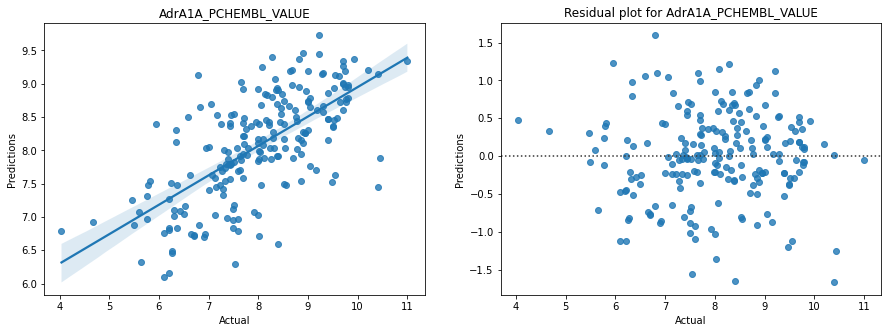

In [14]:
build_graphs(preds, actual, 'AdrA1A_PCHEMBL_VALUE')